# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **economic activity or measures** (see below) for the region of **Matao, Sao Paulo, Brazil**, or **Brazil** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Matao, Sao Paulo, Brazil** to Ann Arbor, USA. In that case at least one source file must be about **Matao, Sao Paulo, Brazil**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Matao, Sao Paulo, Brazil** and **economic activity or measures**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **economic activity or measures**?  For this category you might look at the inputs or outputs to the given economy, or major changes in the economy compared to other regions.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

# Becoming an Independent Data Scientist

## Region and Domain
** State the region and the domain category that your data sets are about. **

Brazil

Economic activity or measures

## Research Question
** You must state a question about the domain category and region that you identified as being
interesting. **

How does the SELIC rate relate with the inflation (IPCA)?

## Links
** You must provide at least two links to publicly accessible datasets. These could be links to
files such as CSV or Excel files, or links to websites which might have data in tabular form,
such as Wikipedia pages. **

1. [SELIC](https://github.com/airtonrampim/Assignment4/blob/main/historicotaxasjuros.csv): This csv was generated from [this page](https://www.bcb.gov.br/controleinflacao/historicotaxasjuros)

2. [IPCA](https://github.com/airtonrampim/Assignment4/blob/main/ipca_202202SerieHist.xls): This xls was obtained from [this page](https://www.ibge.gov.br/estatisticas/economicas/precos-e-custos/9256-indice-nacional-de-precos-ao-consumidor-amplo.html?=&t=downloads) at *IPCA/Serie_Historica/ipca_SerieHist.zip*

3. [IPCA dates](https://github.com/airtonrampim/Assignment4/blob/main/ipca_inpc_ipca15_coleta_divulgacao.csv): This csv was obtained from [this page](https://www.ibge.gov.br/estatisticas/economicas/precos-e-custos/9256-indice-nacional-de-precos-ao-consumidor-amplo.html?=&t=o-que-e)

4. [IPCA goals](https://github.com/airtonrampim/Assignment4/blob/main/historicometas.csv): This csv was generated from [this page](https://www.bcb.gov.br/controleinflacao/historicometas)

## Image

** You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo’s principles of truthfulness, functionality, beauty, and insightfulness.**

Preparing the dataframe

In [1]:
import pandas as pd
import numpy as np
from dateutil.relativedelta import relativedelta

to_datetime = lambda x: pd.to_datetime(x, format='%d/%m/%Y')

selic = pd.read_csv('https://github.com/airtonrampim/Assignment4/blob/main/historicotaxasjuros.csv?raw=true',
                    sep=';', decimal=',')
ipca_0 = pd.read_excel('https://github.com/airtonrampim/Assignment4/blob/main/ipca_202202SerieHist.xls?raw=true',
                       skiprows = 226)
ipca_dates = pd.read_csv('https://github.com/airtonrampim/Assignment4/blob/main/ipca_inpc_ipca15_coleta_divulgacao.csv?raw=true',
                         sep=';', parse_dates = ['inicio_coleta', 'fim_coleta'], date_parser = to_datetime)
ipca_goal = pd.read_csv('https://github.com/airtonrampim/Assignment4/blob/main/historicometas.csv?raw=true',
                        sep=';', decimal=',')


if ('Inicio' not in selic.columns) and ('Fim' not in selic.columns):
    selic = (selic
             .join(selic['Período de vigência']
                   .str
                   .extract('(?P<Inicio>\d{2}/\d{2}/\d{4}) -(?: (?P<Fim>\d{2}/\d{2}/\d{4}))?', 
                            expand=True)))
    selic['Fim'] = selic['Fim'].fillna(pd.datetime.today().strftime('%d/%m/%Y'))
    selic['Inicio'] = to_datetime(selic['Inicio'])
    selic['Fim'] = to_datetime(selic['Fim'])


ipca_0 = pd.concat([ipca_0.iloc[39:64], ipca_0.iloc[73:137], ipca_0.iloc[146:187]])
ipca_0 = ipca_0.dropna(how = 'all')
ipca_0 = ipca_0.fillna(method='ffill')
ipca_0.columns = ['ANO', 'MES', 'NÚMERO ÍNDICE (DEZ 93 = 100)', 
                  'NO MÊS (%)', '3 MESES (%)', '6 MESES (%)', 'NO ANO (%)', '12 MESES (%)']


ipca_dates = ipca_dates[ipca_dates['indice'] == 'ipca/inpc']
if ('MES' not in ipca_dates.columns) and ('ANO' not in ipca_dates.columns):
    ipca_dates = (ipca_dates
                  .join(ipca_dates['mes_ref']
                        .str
                        .upper()
                        .str
                        .extract('(?P<MES>\w{3})/(?P<ANO>\d{2})',
                                 expand = True)))
    ipca_dates['ANO'] = ipca_dates['ANO'].astype(int) + 2000


ipca = (ipca_0.set_index(['ANO', 'MES'])
        .join(ipca_dates.set_index(['ANO', 'MES']), how='inner'))
ipca.sort_values('fim_coleta', inplace = True)


ipca_goal['Date'] = to_datetime(ipca_goal['Ano'].apply(lambda x: '31/12/%s' % x))
if ('Inferior' not in ipca_goal.columns) and ('Superior' not in ipca_goal.columns):
    ipca_goal = (ipca_goal
                 .join((ipca_goal['Limites Inferior e Superior (%)']
                        .str
                        .extract('(?P<Inferior>\d+(?:,\d+)?)\s*-\s*(?P<Superior>\d+(?:,\d+)?)', expand = True))))
    ipca_goal['Inferior'] = ipca_goal['Inferior'].str.replace(',', '.').astype(float)
    ipca_goal['Superior'] = ipca_goal['Superior'].str.replace(',', '.').astype(float)
ipca_goal['Dentro Intervalo'] = True
ipca_goal['Dentro Intervalo'] = \
  ((ipca_goal['Inflação Efetiva (IPCA % a.a.)'] >= ipca_goal['Inferior']) & \
  (ipca_goal['Inflação Efetiva (IPCA % a.a.)'] <= ipca_goal['Superior'])) | \
  (ipca_goal['Inflação Efetiva (IPCA % a.a.)'].isnull())

s_ipca = ipca.set_index('fim_coleta')['12 MESES (%)']
s_selic = selic.set_index('Fim')['Meta SELIC % a.a.']
s_ipca_inf = ipca_goal.set_index('Date')['Inferior']
s_ipca_sup = ipca_goal.set_index('Date')['Superior']
s_ipca_range = ipca_goal.set_index('Date')['Dentro Intervalo']
df = pd.DataFrame({'IPCA': s_ipca[~s_ipca.index.duplicated()],
                   'SELIC': s_selic[~s_selic.index.duplicated()],
                   'IPCA Inf': s_ipca_inf[~s_ipca_inf.index.duplicated()],
                   'IPCA Sup': s_ipca_sup[~s_ipca_sup.index.duplicated()],
                   'IPCA In Range': s_ipca_range[~s_ipca_range.index.duplicated()]})
df[['IPCA In Range', 'IPCA Inf', 'IPCA Sup']] = df[['IPCA In Range', 'IPCA Inf', 'IPCA Sup']].fillna(method = 'bfill')
df = df.fillna(method = 'ffill')
df = df[(df.index >= '20/02/2012') & (df.index <= '20/02/2022')]
df['IPCA Group'] = df['IPCA In Range'].astype(int).diff(periods = 1).fillna(0).abs().cumsum()

Preparing the plot

<IPython.core.display.Javascript object>


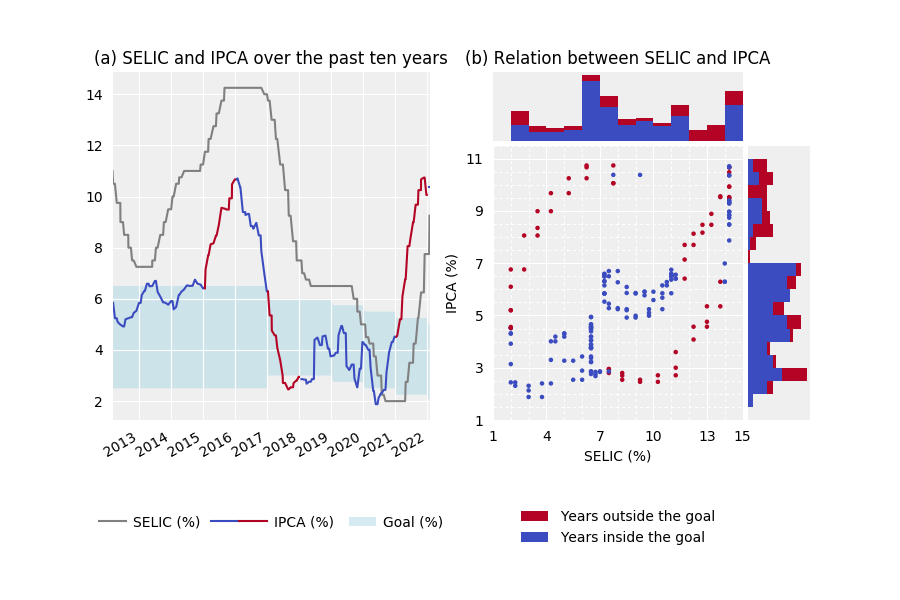

In [2]:
%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
from matplotlib.patches import Patch
from mpl_toolkits.axes_grid1 import make_axes_locatable


fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (9, 6))

df.plot(y = 'SELIC', kind='line', color='gray', ax = ax1)
for group, frame in df.groupby('IPCA Group'):
    ax1.plot(frame.index, frame['IPCA'], color = plt.cm.coolwarm(1-frame['IPCA In Range'].iloc[0].astype(float)))
ax1.fill_between(df.index, df['IPCA Inf'], df['IPCA Sup'], facecolor='lightblue', edgecolor='none', label='Goal (%)', alpha=0.5)

df.plot('SELIC', 'IPCA', kind='scatter', c = ~df['IPCA In Range'], s = 5, cmap='coolwarm', colorbar=False, zorder=100, ax = ax2)

lax2 = make_axes_locatable(ax2)
ax2x = lax2.append_axes('top', size='25%', pad=0.05)
ax2y = lax2.append_axes('right', size='25%', pad=0.05)

selic_bins = np.arange(1,16,1)
ipca_bins = np.arange(1,12,0.5)
# ax2x.hist(df['SELIC'], bins = selic_bins, color = 'gray')
ax2x.hist([df[df['IPCA In Range']]['SELIC'], df[~df['IPCA In Range']]['SELIC']],
          bins = selic_bins,
          color = [plt.cm.coolwarm(0.0), plt.cm.coolwarm(1.0)], stacked = True)
ax2y.hist([df[df['IPCA In Range']]['IPCA'], df[~df['IPCA In Range']]['IPCA']],
          bins = ipca_bins,
          color = [plt.cm.coolwarm(0.0), plt.cm.coolwarm(1.0)], stacked = True, orientation = 'horizontal')

fig.subplots_adjust(bottom = 0.3)

ax1.tick_params(left = False, bottom = False)
ax1.set_facecolor('#efefef')
ax1.grid(True, color = 'white')
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax2.set_xticks([1, 4, 7, 10, 13, 15])
ax2.set_yticks([1, 3, 5, 7, 9, 11])
ax2.set_xticks(selic_bins, minor = True)
ax2.set_yticks(ipca_bins, minor = True)
ax2.tick_params(left = False, bottom = False, which='both')
ax2.set_facecolor('#efefef')
ax2.grid(True, which='major', color = 'white', linestyle='solid')
ax2.grid(True, which='minor', color = 'white', linestyle='dotted')
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['right'].set_visible(False)

ax2.set_xlabel('SELIC (%)')
ax2.set_ylabel('IPCA (%)')

ax2x.set_xlabel('')
ax2x.set_ylabel('')
ax2x.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
ax2x.spines['top'].set_visible(False)
ax2x.spines['bottom'].set_visible(False)
ax2x.spines['left'].set_visible(False)
ax2x.spines['right'].set_visible(False)
ax2x.set_facecolor(ax2.get_facecolor())
ax2x.set_xlim(ax2.get_xlim())

ax2y.set_xlabel('')
ax2y.set_ylabel('')
ax2y.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
ax2y.spines['top'].set_visible(False)
ax2y.spines['bottom'].set_visible(False)
ax2y.spines['left'].set_visible(False)
ax2y.spines['right'].set_visible(False)
ax2y.set_facecolor(ax2.get_facecolor())
ax2y.set_ylim(ax2.get_ylim())

handles, labels = ax1.get_legend_handles_labels()
ax1.legend([handles[0], handles[1], handles[2], handles[-1]], ['SELIC (%)    ', '', 'IPCA (%)     ', 'Goal (%)'],
           ncol = 4, loc = 'lower center', bbox_to_anchor = (0.5, -0.35), frameon=False,
           columnspacing=-0.5, handletextpad=0.5, handlelength=2.0)
ax2.legend([Patch(edgecolor='none', facecolor=plt.cm.coolwarm(1.0)), Patch(edgecolor='none', facecolor=plt.cm.coolwarm(0.0))],
          ['Years outside the goal', 'Years inside the goal'], loc = 'lower center', bbox_to_anchor = (0.5, -0.5), frameon=False)

ax1.set_title('(a) SELIC and IPCA over the past ten years')
ax2x.set_title('(b) Relation between SELIC and IPCA')

## Discussion

** You must contribute a short (1-2 paragraph) written justification of how your visualization
addresses your stated research question. **

This visualization provides an illustration of the SELIC Meta rate per year, which is the interest rate in the Brazilian economy defined periodically by the BCB's Monetary Policy Committee (Copom), and the IPCA rate accumulated for the last 12 months, which is the main metric to measure inflation. When the inflation rises, the SELIC is increased in order to discourage consumption (hence, reducing inflation) and vice versa. So, some relation between those two rates are expected, which motivated the question for this assignment. The goal for the inflation is established as a range for the accumulated IPCA of every year by the National Monetary Council (CMN).

The Figure (a) shows the evolution of the SELIC and the IPCA over the past ten years. The goal range is marked as a shaded region colored lightblue. If the IPCA of December goes into the goal range, the line over the whole year is marked as blue. Otherwise, it's marked as red. It can be seen that the curves for SELIC and IPCA, roughly, grows together, just as expected from the previous discussion. The Figure (b) shows the scatter plot between the two rates for the years inside (blue) and outside (red) the goal range. The lateral histograms are stacked for each case. The bin size is given by the minor ticks of the scatter plot. We see that each category tends to group with some exceptions like the separated group of blue dots at the upper right part of the plot. By the Figure (a) we can see that those points are related to the year 2016, which just happens to enter the goal range at the last month. Altough this conclusion can also be inferred by the Figure (a), those kind of time-dependent curves may be hard to draw clearly if the inflation just happens to oscillate too much, which could be a situation where we analyze over a period of time much longer than 10 years.

## Cairo's principles

As this assignment is for the whole course, you must incorporate and defend the principles discussed in the first week, specifically, Cairo’s principles of truth, beauty, function, and insight.

For each of the following prompts, please provide a response that links each principle to one or more elements of your visual.

Describe your design choices for your visual in regards to Cairo's principle of **truthfulness**.

Describe your design choices for your visual in regards to Cairo's principle of **beauty**.

Describe your design choices for your visual in regards to Cairo's principle of **functionality**.

Describe your design choices for your visual in regards to Cairo's principle of **insightfulness**.

Since the goal is to show a relation between two rates, I chose a period (in this case, over the last 10 years) that could illustrate highs and lows for the rates, which can be seen in the visualization. That decision was based on the **truthfulness** principle. Otherwise it could give a wrong conclusion of stability to the audience.

Coloring the line of the Figure (a) as red and blue was a little embellishment added based on the **beauty** principle, since such cases could be inferred by just looking if the line enters the goal region at the end of each year.

Removing the spines for all plots and the ticks for the histograms, painting the background as a faint gray just to add a white grid in the background was based on the principle of **functionality** in order to increase the data-ink ratio. 

Coloring the points of the scatter plot was based on the principle of **insightfulness**, since it provides to the audience the detection of some patterns in the data.